### Importing all Dependancies

In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image 
from sklearn.model_selection import train_test_split

In [8]:
normal = os.listdir(r'D:\ai dev\normal_images')
print(normal[0:5])
print('*'*100)
dark = os.listdir(r'D:\ai dev\toodark')
print(dark[0:5])
print('*'*100)

['image0000.jpg', 'image0001.jpg', 'image0002.jpg', 'image0003.jpg', 'image0004.jpg']
****************************************************************************************************
['0071ee47-6c37-4bac-b997-833aacfc5205.jpg', '01b30955-f3bc-4d1c-8ccd-f6b702070645.jpg', '04ac325c-5262-41bb-aa92-c35d089b8e40.jpg', '056945e7-f07a-487e-83f2-94de037529c8.jpg', '058e1501-df23-48d6-9c16-e46b4fe8dbe0.jpg']
****************************************************************************************************


In [9]:
print('Number of normal images:', len(normal))
print('Number of too dark images:', len(dark))

Number of normal images: 891
Number of too dark images: 218


In [10]:
# create the labels

normal_labels = [1]*891

dark_labels = [0]*218

In [11]:
print(len(normal_labels))
print(len(dark_labels))

891
218


In [12]:
labels = normal_labels + dark_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1109
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying Images

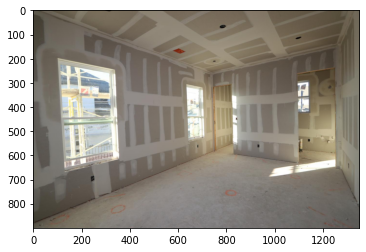

In [18]:
# displaying with light
img = mpimg.imread(r'D:\ai dev\normal_images\image0000.jpg')
imgplot = plt.imshow(img)
plt.show()

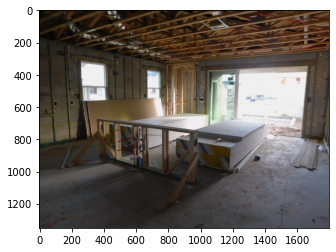

In [19]:
# displaying too dark image
img = mpimg.imread(r'D:\ai dev\toodark\0071ee47-6c37-4bac-b997-833aacfc5205.jpg')
imgplot = plt.imshow(img)
plt.show()

## Image Processing

###  Resize the Images

### Convert the images to numpy arrays

In [33]:
# convert images to numpy arrays

normal_path = r'D:\ai dev\normal_images\\'
data = []

for img_file in normal:
    

    image = Image.open(normal_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [34]:

dark_path = r'D:\ai dev\toodark\\'


for img_file in dark:

    image = Image.open(dark_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [35]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [36]:
print(X.shape)
print(Y.shape)

(1109, 128, 128, 3)
(1109,)


### Traim  Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(1109, 128, 128, 3) (887, 128, 128, 3) (222, 128, 128, 3)


In [40]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

## Building convolutional Network

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(units =1, activation='sigmoid'))

In [43]:
# compile the neural network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
25/25 [==============================] - 14s 519ms/step - loss: 0.5643 - accuracy: 0.7368 - val_loss: 0.4209 - val_accuracy: 0.7978
Epoch 2/30
25/25 [==============================] - 11s 427ms/step - loss: 0.4339 - accuracy: 0.7957 - val_loss: 0.4059 - val_accuracy: 0.7978
Epoch 3/30
25/25 [==============================] - 12s 498ms/step - loss: 0.3983 - accuracy: 0.7970 - val_loss: 0.3900 - val_accuracy: 0.7978
Epoch 4/30
25/25 [==============================] - 11s 434ms/step - loss: 0.3946 - accuracy: 0.8058 - val_loss: 0.3826 - val_accuracy: 0.7978
Epoch 5/30
25/25 [==============================] - 11s 453ms/step - loss: 0.3784 - accuracy: 0.7957 - val_loss: 0.3919 - val_accuracy: 0.7416
Epoch 6/30
25/25 [==============================] - 10s 420ms/step - loss: 0.3759 - accuracy: 0.7970 - val_loss: 0.4235 - val_accuracy: 0.7978
Epoch 7/30
25/25 [==============================] - 18s 727ms/step - loss: 0.3641 - accuracy: 0.7907 - val_loss: 0.3668 - val_accuracy: 0.7978

### model Evaluation

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

7/7 [==============================] - 1s 89ms/step - loss: 0.8273 - accuracy: 0.6486
Test Accuracy = 0.6486486196517944


In [46]:
#plot of accuracy and the loss against all the epochs

def plotting(history,keyword):
  
  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("model "+keyword)
  plt.ylabel(keyword)
  plt.xlabel("epoch")

  plt.legend(["training data","validation data"])

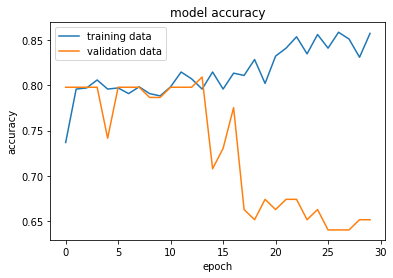

In [47]:
plotting(history,"accuracy")

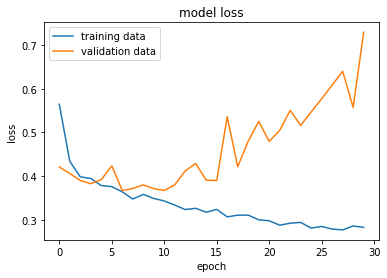

In [48]:
plotting(history,"loss")

## Prediction

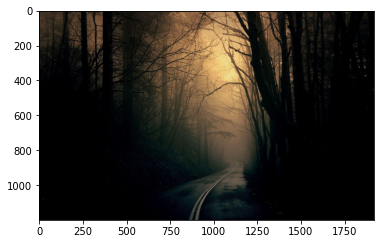

1/1 [==============================] - 0s 27ms/step
input_prediction :  [[0.41530818]]
0
The image is too dark image


In [52]:
import cv2
input_image_path = r'D:\ai dev\darkimg.JPG'

input_image = cv2.imread(input_image_path)

img = mpimg.imread( r'D:\ai dev\darkimg.JPG')
imgplot = plt.imshow(img)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print("input_prediction : ",input_prediction)


input_pred_label = np.where(input_prediction[0][0]>0.5,1,0)

print(input_pred_label)


if input_pred_label == 1:

    print('The image is normal well lit image')

else:

    print('The image is too dark image')

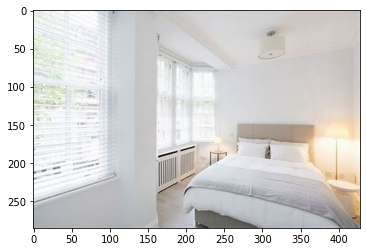

1/1 [==============================] - 0s 24ms/step
input_prediction :  [[1.]]
1
The image is normal well lit image


In [54]:

input_image_path = r'D:\ai dev\well_lit.JPEG'

input_image = cv2.imread(input_image_path)

img = mpimg.imread( r'D:\ai dev\well_lit.JPEG')
imgplot = plt.imshow(img)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print("input_prediction : ",input_prediction)


input_pred_label = np.where(input_prediction[0][0]>0.5,1,0)

print(input_pred_label)


if input_pred_label == 1:

    print('The image is normal well lit image')

else:

    print('The image is too dark image')